In [24]:
import pandas as pd
# Global Consumption Database http://datatopics.worldbank.org/consumption/detail
# http://datatopics.worldbank.org/consumption/AboutDatabase
url = "http://tinyurl.com/ybv7recp"

df = pd.read_csv(url)

In [10]:
df.head()

,Local Currency,$PPP,US$,Country_Hide,Number of Records,Category,Product or Service,Sector,Age Group,Area,...,data,exchrate,Consumption Segment,Indicator,Level,pppcf,"Sector, Category or Product",Region,Sex,Unit
0,0.004764,0.006293,0.003329,Ghana,1,NaN,NaN,NaN,NaN,National,...,4764,1.431,Lowest,Nb. of households in sample,National,0.757,NaN,Sub-Saharan Africa,NaN,Number
1,0.003271,0.000757,0.000447,Lesotho,1,NaN,NaN,NaN,NaN,National,...,3271,7.321,Lowest,Nb. of households in sample,National,4.321,NaN,Sub-Saharan Africa,NaN,Number
2,0.005727,0.000898,0.000782,Namibia,1,NaN,NaN,NaN,NaN,National,...,5727,7.321,Lowest,Nb. of households in sample,National,6.377,NaN,Sub-Saharan Africa,NaN,Number
3,0.001965,0.000409,0.000268,Swaziland,1,NaN,NaN,NaN,NaN,National,...,1965,7.321,Lowest,Nb. of households in sample,National,4.806,NaN,Sub-Saharan Africa,NaN,Number
4,0.007416,0.001297,0.001013,South Africa,1,NaN,NaN,NaN,NaN,National,...,7416,7.321,Lowest,Nb. of households in sample,National,5.717,NaN,Sub-Saharan Africa,NaN,Number


In [12]:
df.columns

Index([u'Local Currency', u'$PPP', u'US$', u'Country_Hide',
       u'Number of Records', u'Category', u'Product or Service', u'Sector',
       u'Age Group', u'Area', u'Country', u'countrycode', u'data', u'exchrate',
       u'Consumption Segment', u'Indicator', u'Level', u'pppcf',
       u'Sector, Category or Product', u'Region', u'Sex', u'Unit'],
      dtype='object')

In [22]:
df['Region'].value_counts()

Sub-Saharan Africa                 675
South Asia                         645
Latin America and Caribbean        555
Eastern Europe and Central Asia    285
East Asia and Pacific              150
Middle East and North Africa        90
Name: Region, dtype: int64

In [25]:
# let's get total spending by Region
df.groupby("Region").sum()['US$']

Region
East Asia and Pacific              0.045008
Eastern Europe and Central Asia    0.213360
Latin America and Caribbean        0.388072
Middle East and North Africa       0.114321
South Asia                         0.023376
Sub-Saharan Africa                 0.074198
Name: US$, dtype: float64

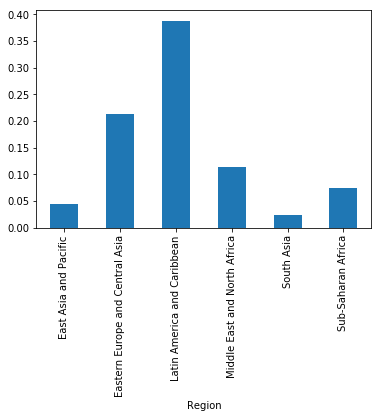

In [28]:
# let's plot:
%matplotlib inline
df.groupby("Region").sum()['US$'].plot.bar()

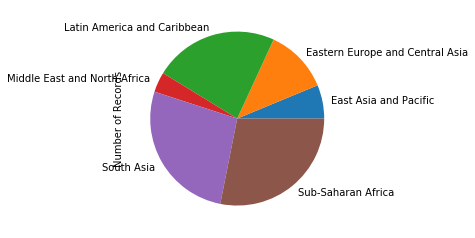

In [63]:
# Participants in this survey
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df.groupby("Region").count()['Number of Records'].plot.pie(ax=ax)
ax.set_aspect("equal")

# There's a lot of data... how do we filter?

![img](https://github.com/story645/EAS213/raw/master/2016/figs/masking.png)

In [39]:
# this finds all rows where the Region string contains Africa
# https://pandas.pydata.org/pandas-docs/stable/text.html
df['Region'].str.contains('Africa')

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
2370    False
2371    False
2372    False
2373    False
2374    False
2375    False
2376    False
2377    False
2378    False
2379    False
2380    False
2381    False
2382    False
2383    False
2384    False
2385    False
2386    False
2387    False
2388    False
2389    False
2390    False
2391     True
2392     True
2393     True
2394     True
2395     True
2396     True
2397     True
2398     True
2399     True
Name: Region, Length: 2400, dtype: bool

In [41]:
#Let's use that filter to get all rows from Africa
africa = df[df['Region'].str.contains('Africa')]

In [42]:
africa.head()

,Local Currency,$PPP,US$,Country_Hide,Number of Records,Category,Product or Service,Sector,Age Group,Area,...,data,exchrate,Consumption Segment,Indicator,Level,pppcf,"Sector, Category or Product",Region,Sex,Unit
0,0.004764,0.006293,0.003329,Ghana,1,NaN,NaN,NaN,NaN,National,...,4764,1.431,Lowest,Nb. of households in sample,National,0.757,NaN,Sub-Saharan Africa,NaN,Number
1,0.003271,0.000757,0.000447,Lesotho,1,NaN,NaN,NaN,NaN,National,...,3271,7.321,Lowest,Nb. of households in sample,National,4.321,NaN,Sub-Saharan Africa,NaN,Number
2,0.005727,0.000898,0.000782,Namibia,1,NaN,NaN,NaN,NaN,National,...,5727,7.321,Lowest,Nb. of households in sample,National,6.377,NaN,Sub-Saharan Africa,NaN,Number
3,0.001965,0.000409,0.000268,Swaziland,1,NaN,NaN,NaN,NaN,National,...,1965,7.321,Lowest,Nb. of households in sample,National,4.806,NaN,Sub-Saharan Africa,NaN,Number
4,0.007416,0.001297,0.001013,South Africa,1,NaN,NaN,NaN,NaN,National,...,7416,7.321,Lowest,Nb. of households in sample,National,5.717,NaN,Sub-Saharan Africa,NaN,Number


In [48]:
#let's group by country and area:
africa.groupby(["Country_Hide", "Area"]).median()

Local Currency          $PPP  \
Country_Hide                Area                                     
Benin                       National        0.000693  2.370000e-06   
                            Rural           0.000191  6.530000e-07   
                            Urban           0.000502  1.720000e-06   
Burkina Faso                National        0.000845  3.380000e-06   
                            Rural           0.000138  5.530000e-07   
                            Urban           0.000707  2.830000e-06   
Burundi                     National        0.000195  2.980000e-07   
                            Rural           0.000020  3.060000e-08   
                            Urban           0.000175  2.680000e-07   
Cabo Verde                  National        0.002815  3.320000e-05   
                            Rural           0.002075  2.450000e-05   
                            Urban           0.000541  6.380000e-06   
Cameroon                    National        0.003319  1.080000e-05   
                            Rural           0.000199  6.470000e-07   
                            Urban           0.003120  1.010000e-05   
Chad                        National        0.001846  5.390000e-06   
                            Rural           0.000752  2.190000e-06   
                            Urban           0.001094  3.190000e-06   
Congo, Dem. Rep.            National        0.000138  1.900000e-07   
                            Rural           0.000018  2.480000e-08   
                            Urban           0.000120  1.660000e-07   
Congo, Rep.                 National        0.002124  4.870000e-06   
                            Rural           0.000654  1.500000e-06   
                            Urban           0.001308  3.000000e-06   
Cote d'Ivoire               National        0.005102  1.530000e-05   
                            Rural           0.001733  5.210000e-06   
                            Urban           0.002318  6.970000e-06   
Djibouti                    National        0.000851  6.860000e-06   
                            Rural           0.000096  7.740000e-07   
                            Urban           0.000570  4.590000e-06   
...                                              ...           ...   
South Africa, Mpulamanga    National        0.000725  1.268150e-04   
                            Rural           0.000426  7.450000e-05   
                            Urban           0.000362  6.330000e-05   
South Africa, North West    National        0.000836  1.462310e-04   
                            Rural           0.000549  9.600000e-05   
                            Urban           0.000287  5.020000e-05   
South Africa, Northern Cape National        0.000381  6.660000e-05   
                            Rural           0.000043  7.520000e-06   
                            Urban           0.000338  5.910000e-05   
South Africa, Western Cape  National        0.000810  1.416830e-04   
                            Rural           0.000057  9.970000e-06   
                            Urban           0.000787  1.376600e-04   
Swaziland                   National        0.000879  1.828960e-04   
                            Rural           0.000264  5.490000e-05   
                            Urban           0.000490  1.019560e-04   
Tanzania                    National        0.001873  2.880000e-06   
                            Rural           0.000127  1.950000e-07   
                            Urban           0.001746  2.680000e-06   
Togo                        National        0.001091  3.710000e-06   
                            Rural           0.000199  6.760000e-07   
                            Urban           0.000892  3.030000e-06   
Uganda                      National        0.001283  1.280000e-06   
                            Rural           0.000718  7.180000e-07   
                            Urban           0.000426  4.260000e-07   
Yemen, Rep.                 National        0.00

In [49]:
# let's pull out the US$ cost
africa.groupby(["Country_Hide", "Area"]).median()['US$']

Country_Hide                 Area    
Benin                        National    1.400000e-06
                             Rural       3.860000e-07
                             Urban       1.010000e-06
Burkina Faso                 National    1.710000e-06
                             Rural       2.790000e-07
                             Urban       1.430000e-06
Burundi                      National    1.580000e-07
                             Rural       1.630000e-08
                             Urban       1.420000e-07
Cabo Verde                   National    3.380000e-05
                             Rural       2.490000e-05
                             Urban       6.500000e-06
Cameroon                     National    6.700000e-06
                             Rural       4.020000e-07
                             Urban       6.300000e-06
Chad                         National    3.730000e-06
                             Rural       1.520000e-06
                             Urban       2.2

In [57]:
# let's turn it into a table
table = africa.groupby(["Country_Hide", "Area"]).median()['US$'].unstack()
table

Area,National,Rural,Urban
Country_Hide,,,
Benin,1.400000e-06,3.860000e-07,1.010000e-06
Burkina Faso,1.710000e-06,2.790000e-07,1.430000e-06
Burundi,1.580000e-07,1.630000e-08,1.420000e-07
Cabo Verde,3.380000e-05,2.490000e-05,6.500000e-06
Cameroon,6.700000e-06,4.020000e-07,6.300000e-06
Chad,3.730000e-06,1.520000e-06,2.210000e-06
"Congo, Dem. Rep.",1.520000e-07,1.990000e-08,1.320000e-07
"Congo, Rep.",4.290000e-06,1.320000e-06,2.640000e-06
Cote d'Ivoire,1.030000e-05,3.500000e-06,4.680000e-06


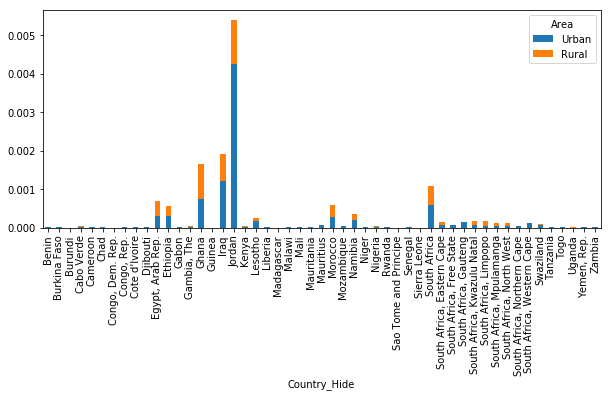

In [61]:
#urban+rural = national, so let's cut that
fig, ax = plt.subplots(figsize=(10,4))
table[["Urban","Rural"]].plot.bar(stacked=True, ax=ax)

# To Do
1. Does the graph in local currency differ
2. Try a different region

In [78]:
# What if I want East Asia and Pacific  and "South Asia"?
asia = df[df['Region'].isin(['East Asia and Pacific', 'South Asia'])]
asia

,Local Currency,$PPP,US$,Country_Hide,Number of Records,Category,Product or Service,Sector,Age Group,Area,...,data,exchrate,Consumption Segment,Indicator,Level,pppcf,"Sector, Category or Product",Region,Sex,Unit
36,0.000354,2.940000e-05,2.770000e-05,Maldives,1,NaN,NaN,NaN,NaN,Rural,...,354,12.800000,Low,Nb. of households in sample,National,12.056000,NaN,South Asia,NaN,Number
37,0.002841,1.285870e-04,6.210000e-05,Bhutan,1,NaN,NaN,NaN,NaN,Rural,...,2841,45.726000,Low,Nb. of households in sample,National,22.094000,NaN,South Asia,NaN,Number
38,0.006118,2.882310e-04,1.337970e-04,India,1,NaN,NaN,NaN,NaN,Rural,...,6118,45.726000,Low,Nb. of households in sample,National,21.226000,NaN,South Asia,NaN,Number
39,0.006405,3.044350e-04,1.378840e-04,Afghanistan,1,NaN,NaN,NaN,NaN,Rural,...,6405,46.452000,Low,Nb. of households in sample,National,21.039000,NaN,South Asia,NaN,Number
40,0.000665,2.010000e-05,9.550000e-06,Bangladesh,1,NaN,NaN,NaN,NaN,Rural,...,665,69.649000,Low,Nb. of households in sample,National,33.017000,NaN,South Asia,NaN,Number
41,0.000779,2.120000e-05,1.060000e-05,Nepal,1,NaN,NaN,NaN,NaN,Rural,...,779,73.155547,Low,Nb. of households in sample,National,36.824550,NaN,South Asia,NaN,Number
42,0.001826,5.450000e-05,2.140000e-05,Pakistan,1,NaN,NaN,NaN,NaN,Rural,...,1826,85.193816,Low,Nb. of households in sample,National,33.533436,NaN,South Asia,NaN,Number
43,0.008860,1.439250e-04,7.840000e-05,Sri Lanka,1,NaN,NaN,NaN,NaN,Rural,...,8860,113.064000,Low,Nb. of households in sample,National,61.560000,NaN,South Asia,NaN,Number
44,0.000100,4.710000e-06,2.190000e-06,"India, Andaman and Nicobar Islands",1,NaN,NaN,NaN,NaN,Rural,...,100,45.726000,Low,Nb. of households in sample,Sub-national,21.226000,NaN,South Asia,NaN,Number
45,0.000474,2.230000e-05,1.040000e-05,"India, Andhra Pradesh",1,NaN,NaN,NaN,NaN,Rural,...,474,45.726000,Low,Nb. of households in sample,Sub-national,21.226000,NaN,South Asia,NaN,Number


In [82]:
asia.groupby(["Area", "Consumption Segment"]).mean()['US$'].unstack()

Consumption Segment,All,Higher,Low,Lowest,Middle
Area,,,,,
National,0.000323,4.666353e-06,0.000098,0.000185,0.000035
Rural,0.000194,5.088292e-07,0.000042,0.000142,0.000009
Urban,0.000129,4.157246e-06,0.000056,0.000043,0.000026


# To do
Add back in country information
Plot the breakdown across consumption section by country (stacked bar plot)


In [86]:
# can we do numbers? 
df[df["exchrate"]>10]

,Local Currency,$PPP,US$,Country_Hide,Number of Records,Category,Product or Service,Sector,Age Group,Area,...,data,exchrate,Consumption Segment,Indicator,Level,pppcf,"Sector, Category or Product",Region,Sex,Unit
5,0.010294,1.873339e-03,7.143650e-04,Ethiopia,1,NaN,NaN,NaN,NaN,National,...,10294,14.410000,Lowest,Nb. of households in sample,National,5.495000,NaN,Sub-Saharan Africa,NaN,Number
6,0.001327,1.161080e-04,4.740000e-05,"Gambia, The",1,NaN,NaN,NaN,NaN,National,...,1327,28.012000,Lowest,Nb. of households in sample,National,11.429000,NaN,Sub-Saharan Africa,NaN,Number
7,0.000600,2.750000e-05,1.950000e-05,Mauritius,1,NaN,NaN,NaN,NaN,National,...,600,30.784000,Lowest,Nb. of households in sample,National,21.785000,NaN,Sub-Saharan Africa,NaN,Number
8,0.009433,5.761310e-04,2.777680e-04,Mozambique,1,NaN,NaN,NaN,NaN,National,...,9433,33.960000,Lowest,Nb. of households in sample,National,16.373000,NaN,Sub-Saharan Africa,NaN,Number
9,0.003137,7.410000e-05,4.390000e-05,Liberia,1,NaN,NaN,NaN,NaN,National,...,3137,71.403000,Lowest,Nb. of households in sample,National,42.322000,NaN,Sub-Saharan Africa,NaN,Number
10,0.009825,1.863760e-04,1.240010e-04,Kenya,1,NaN,NaN,NaN,NaN,National,...,9825,79.233000,Lowest,Nb. of households in sample,National,52.716000,NaN,Sub-Saharan Africa,NaN,Number
11,0.002815,3.320000e-05,3.380000e-05,Cabo Verde,1,NaN,NaN,NaN,NaN,National,...,2815,83.259000,Lowest,Nb. of households in sample,National,84.787000,NaN,Sub-Saharan Africa,NaN,Number
12,0.029721,2.615950e-04,1.977470e-04,Nigeria,1,NaN,NaN,NaN,NaN,National,...,29721,150.298025,Lowest,Nb. of households in sample,National,113.614462,NaN,Sub-Saharan Africa,NaN,Number
13,0.010617,1.336950e-04,7.060000e-05,Malawi,1,NaN,NaN,NaN,NaN,National,...,10617,150.487000,Lowest,Nb. of households in sample,National,79.412000,NaN,Sub-Saharan Africa,NaN,Number
14,0.004607,3.080000e-05,1.670000e-05,Mauritania,1,NaN,NaN,NaN,NaN,National,...,4607,275.894000,Lowest,Nb. of households in sample,National,149.566000,NaN,Sub-Saharan Africa,NaN,Number


In [88]:
#exchange rates greater than 10 and only national areas
df[df["exchrate"]>10 & df["Area"].str.match("Area")]

,Local Currency,$PPP,US$,Country_Hide,Number of Records,Category,Product or Service,Sector,Age Group,Area,...,data,exchrate,Consumption Segment,Indicator,Level,pppcf,"Sector, Category or Product",Region,Sex,Unit
0,0.004764,0.006293,0.003329,Ghana,1,NaN,NaN,NaN,NaN,National,...,4764,1.431000,Lowest,Nb. of households in sample,National,0.757000,NaN,Sub-Saharan Africa,NaN,Number
1,0.003271,0.000757,0.000447,Lesotho,1,NaN,NaN,NaN,NaN,National,...,3271,7.321000,Lowest,Nb. of households in sample,National,4.321000,NaN,Sub-Saharan Africa,NaN,Number
2,0.005727,0.000898,0.000782,Namibia,1,NaN,NaN,NaN,NaN,National,...,5727,7.321000,Lowest,Nb. of households in sample,National,6.377000,NaN,Sub-Saharan Africa,NaN,Number
3,0.001965,0.000409,0.000268,Swaziland,1,NaN,NaN,NaN,NaN,National,...,1965,7.321000,Lowest,Nb. of households in sample,National,4.806000,NaN,Sub-Saharan Africa,NaN,Number
4,0.007416,0.001297,0.001013,South Africa,1,NaN,NaN,NaN,NaN,National,...,7416,7.321000,Lowest,Nb. of households in sample,National,5.717000,NaN,Sub-Saharan Africa,NaN,Number
5,0.010294,0.001873,0.000714,Ethiopia,1,NaN,NaN,NaN,NaN,National,...,10294,14.410000,Lowest,Nb. of households in sample,National,5.495000,NaN,Sub-Saharan Africa,NaN,Number
6,0.001327,0.000116,0.000047,"Gambia, The",1,NaN,NaN,NaN,NaN,National,...,1327,28.012000,Lowest,Nb. of households in sample,National,11.429000,NaN,Sub-Saharan Africa,NaN,Number
7,0.000600,0.000028,0.000019,Mauritius,1,NaN,NaN,NaN,NaN,National,...,600,30.784000,Lowest,Nb. of households in sample,National,21.785000,NaN,Sub-Saharan Africa,NaN,Number
8,0.009433,0.000576,0.000278,Mozambique,1,NaN,NaN,NaN,NaN,National,...,9433,33.960000,Lowest,Nb. of households in sample,National,16.373000,NaN,Sub-Saharan Africa,NaN,Number
9,0.003137,0.000074,0.000044,Liberia,1,NaN,NaN,NaN,NaN,National,...,3137,71.403000,Lowest,Nb. of households in sample,National,42.322000,NaN,Sub-Saharan Africa,NaN,Number


In [92]:
#exchange rates greater than 10 and only national areas
df[df["exchrate"]>10 | df["Area"].str.match("Area")]

,Local Currency,$PPP,US$,Country_Hide,Number of Records,Category,Product or Service,Sector,Age Group,Area,...,data,exchrate,Consumption Segment,Indicator,Level,pppcf,"Sector, Category or Product",Region,Sex,Unit
0,0.004764,0.006293,0.003329,Ghana,1,NaN,NaN,NaN,NaN,National,...,4764,1.431000,Lowest,Nb. of households in sample,National,0.757000,NaN,Sub-Saharan Africa,NaN,Number
1,0.003271,0.000757,0.000447,Lesotho,1,NaN,NaN,NaN,NaN,National,...,3271,7.321000,Lowest,Nb. of households in sample,National,4.321000,NaN,Sub-Saharan Africa,NaN,Number
2,0.005727,0.000898,0.000782,Namibia,1,NaN,NaN,NaN,NaN,National,...,5727,7.321000,Lowest,Nb. of households in sample,National,6.377000,NaN,Sub-Saharan Africa,NaN,Number
3,0.001965,0.000409,0.000268,Swaziland,1,NaN,NaN,NaN,NaN,National,...,1965,7.321000,Lowest,Nb. of households in sample,National,4.806000,NaN,Sub-Saharan Africa,NaN,Number
4,0.007416,0.001297,0.001013,South Africa,1,NaN,NaN,NaN,NaN,National,...,7416,7.321000,Lowest,Nb. of households in sample,National,5.717000,NaN,Sub-Saharan Africa,NaN,Number
5,0.010294,0.001873,0.000714,Ethiopia,1,NaN,NaN,NaN,NaN,National,...,10294,14.410000,Lowest,Nb. of households in sample,National,5.495000,NaN,Sub-Saharan Africa,NaN,Number
6,0.001327,0.000116,0.000047,"Gambia, The",1,NaN,NaN,NaN,NaN,National,...,1327,28.012000,Lowest,Nb. of households in sample,National,11.429000,NaN,Sub-Saharan Africa,NaN,Number
7,0.000600,0.000028,0.000019,Mauritius,1,NaN,NaN,NaN,NaN,National,...,600,30.784000,Lowest,Nb. of households in sample,National,21.785000,NaN,Sub-Saharan Africa,NaN,Number
8,0.009433,0.000576,0.000278,Mozambique,1,NaN,NaN,NaN,NaN,National,...,9433,33.960000,Lowest,Nb. of households in sample,National,16.373000,NaN,Sub-Saharan Africa,NaN,Number
9,0.003137,0.000074,0.000044,Liberia,1,NaN,NaN,NaN,NaN,National,...,3137,71.403000,Lowest,Nb. of households in sample,National,42.322000,NaN,Sub-Saharan Africa,NaN,Number


# To do
1. Filter data on any criteria that interests you

In [104]:
#Fancy grouping- pivot_table
pt = df.pivot_table(index='Region', 
            columns=['Area', 'Consumption Segment'], 
            aggfunc={'US$':'sum',
                     'Number of Records':'count'})
pt

Number of Records                           \
Area                                     National                            
Consumption Segment                           All Higher Low Lowest Middle   
Region                                                                       
East Asia and Pacific                          10     10  10     10     10   
Eastern Europe and Central Asia                19     19  19     19     19   
Latin America and Caribbean                    37     37  37     37     37   
Middle East and North Africa                    6      6   6      6      6   
South Asia                                     43     43  43     43     43   
Sub-Saharan Africa                             45     45  45     45     45   

                                                                  ...     \
Area                            Rural                             ...      
Consumption Segment               All Higher Low Lowest Middle    ...      
Region                                                            ...      
East Asia and Pacific              10     10  10     10     10    ...      
Eastern Europe and Central Asia    19     19  19     19     19    ...      
Latin America and Caribbean        37     37  37     37     37    ...      
Middle East and North Africa        6      6   6      6      6    ...      
South Asia                         43     43  43     43     43    ...      
Sub-Saharan Africa                 45     45  45     45     45    ...      

                                      US$                                    \
Area                                Rural                                     
Consumption Segment                   All        Higher       Low    Lowest   
Region                                                                        
East Asia and Pacific            0.006720  2.647865e-05  0.001625  0.004621   
Eastern Europe and Central Asia  0.025013  1.907808e-03  0.010834  0.001764   
Latin America and Caribbean      0.032796  1.245463e-03  0.012782  0.014084   
Middle East and North Africa     0.008819  5.371610e-05  0.004955  0.002372   
South Asia                       0.003548  4.893000e-07  0.000615  0.002908   
Sub-Saharan Africa               0.008880  7.813731e-05  0.002526  0.005868   

                                                                         \
Area                                          Urban                       
Consumption Segment                Middle       All    Higher       Low   
Region                                                                    
East Asia and Pacific            0.000448  0.004532  0.000215  0.001944   
Eastern Europe and Central Asia  0.010507  0.028327  0.003165  0.008803   
Latin America and Caribbean      0.004685  0.064222  0.004971  0.027766   
Middle East and North Africa     0.001437  0.019762  0.000692  0.010652   
South Asia                       0.000024  0.002296  0.000005  0.001006   
Sub-Saharan Africa               0.000408  0.009669  0.000896  0.004132   

                                                     
Area                                                 
Consumption Segment                Lowest    Middle  
Region                                               
East Asia and Pacific            0.001157  0.001216  
Eastern Europe and Central Asia  0.001333  0.015026  
Latin America and Caribbean      0.014838  0.016648  
Middle East and North Africa     0.002589  0.005829  
South Asia                       0.001144  0.000141  
Sub-Saharan Africa               0.002696  0.001946  

[6 rows x 30 columns]

In [105]:
#sometimes flipping is easier
pt.T

Region                                          East Asia and Pacific  \
                  Area     Consumption Segment                          
Number of Records National All                              10.000000   
                           Higher                           10.000000   
                           Low                              10.000000   
                           Lowest                           10.000000   
                           Middle                           10.000000   
                  Rural    All                              10.000000   
                           Higher                           10.000000   
                           Low                              10.000000   
                           Lowest                           10.000000   
                           Middle                           10.000000   
                  Urban    All                              10.000000   
                           Higher                           10.000000   
                           Low                              10.000000   
                           Lowest                           10.000000   
                           Middle                           10.000000   
US$               National All                               0.011252   
                           Higher                            0.000241   
                           Low                               0.003569   
                           Lowest                            0.005778   
                           Middle                            0.001664   
                  Rural    All                               0.006720   
                           Higher                            0.000026   
                           Low                               0.001625   
                           Lowest                            0.004621   
                           Middle                            0.000448   
                  Urban    All                               0.004532   
                           Higher                            0.000215   
                           Low                               0.001944   
                           Lowest                            0.001157   
                           Middle                            0.001216   

Region                                          Eastern Europe and Central Asia  \
                  Area     Consumption Segment                                    
Number of Records National All                                        19.000000   
                           Higher                                     19.000000   
                           Low                                        19.000000   
                           Lowest                                     19.000000   
                           Middle                                     19.000000   
                  Rural    All                                        19.000000   
                           Higher                                     19.000000   
                           Low                                        19.000000   
                           Lowest                                     19.000000   
                           Middle                                     19.000000   
                  Urban    All                                        19.000000   
                           Higher                                     19.000000   
                           Low                                        19.000000   
                           Lowest                                     19.000000   
                           Middle                                     19.000000   
US$               National All                                         0.053340   
                           Higher                                      0.005073   
                           Low                                         0.019637   
   

In [107]:
pt.keys()

MultiIndex(levels=[[u'Number of Records', u'US$'], [u'National', u'Rural', u'Urban'], [u'All', u'Higher', u'Low', u'Lowest', u'Middle']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=[None, u'Area', u'Consumption Segment'])

In [108]:
pt["Number of Records"]

Area                            National                          Rural  \
Consumption Segment                  All Higher Low Lowest Middle   All   
Region                                                                    
East Asia and Pacific                 10     10  10     10     10    10   
Eastern Europe and Central Asia       19     19  19     19     19    19   
Latin America and Caribbean           37     37  37     37     37    37   
Middle East and North Africa           6      6   6      6      6     6   
South Asia                            43     43  43     43     43    43   
Sub-Saharan Africa                    45     45  45     45     45    45   

Area                                                     Urban             \
Consumption Segment             Higher Low Lowest Middle   All Higher Low   
Region                                                                      
East Asia and Pacific               10  10     10     10    10     10  10   
Eastern Europe and Central Asia     19  19     19     19    19     19  19   
Latin America and Caribbean         37  37     37     37    37     37  37   
Middle East and North Africa         6   6      6      6     6      6   6   
South Asia                          43  43     43     43    43     43  43   
Sub-Saharan Africa                  45  45     45     45    45     45  45   

Area                                           
Consumption Segment             Lowest Middle  
Region                                         
East Asia and Pacific               10     10  
Eastern Europe and Central Asia     19     19  
Latin America and Caribbean         37     37  
Middle East and North Africa         6      6  
South Asia                          43     43  
Sub-Saharan Africa                  45     45

In [109]:
pt["Number of Records"]["National"]

Consumption Segment,All,Higher,Low,Lowest,Middle
Region,,,,,
East Asia and Pacific,10,10,10,10,10
Eastern Europe and Central Asia,19,19,19,19,19
Latin America and Caribbean,37,37,37,37,37
Middle East and North Africa,6,6,6,6,6
South Asia,43,43,43,43,43
Sub-Saharan Africa,45,45,45,45,45


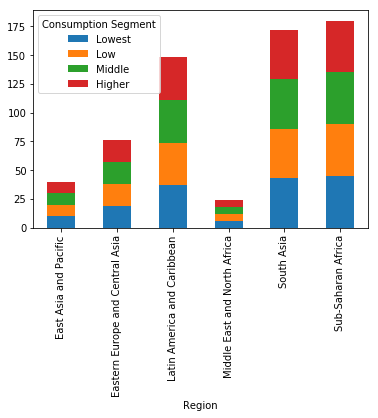

In [115]:
pt["Number of Records"]["National"][["Lowest", "Low","Middle","Higher"]].plot.bar(stacked=True)

# Try your own